In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
def getData(year,months=['01','02','03','04','05','06','07','08','09','10','11','12']):
    # procedure accepts year (as string) and optional list of months (strings) for which to retreive data
    # will return a df with the DIVVY data for that year and month(s)
    import pandas as pd

    if not isinstance(year,str):
        year = str(year)

    if not isinstance(months,list):
        months = [months]

    if int(year) >= 2020:
        workDir = '/home/alp/Google Drive/Python/DataSets/Data_Divvy/'
    else:
        workDir = '/home/alp/Google Drive/Python/DataSets/Data_Divvy/pre2020/'

    fileName = year + months[0] + '-divvy-tripdata.json'
    print(fileName)
    retData = pd.read_json(workDir+fileName,orient='index')

    if len(months) > 0:
        for month in months[1:]:
                fileName = year + month + '-divvy-tripdata.json'
                print(fileName)
                newData = pd.read_json(workDir+fileName,orient='index')
                retData = pd.concat([retData,newData])

    return retData

In [3]:
data19 = getData('2019')
data19.shape

201901-divvy-tripdata.json
201902-divvy-tripdata.json
201903-divvy-tripdata.json
201904-divvy-tripdata.json
201905-divvy-tripdata.json
201906-divvy-tripdata.json
201907-divvy-tripdata.json
201908-divvy-tripdata.json
201909-divvy-tripdata.json
201910-divvy-tripdata.json
201911-divvy-tripdata.json
201912-divvy-tripdata.json


(3818004, 16)

In [4]:
data19.drop(columns = ['trip_id', 'bikeid', 'from_station_name',
       'to_station_name', 'gender', 'birthyear','tripduration'],inplace=True)
data19['tripduration'] = data19['end_time'] - data19['start_time']
data19.drop(data19[data19['tripduration'] < '0:00:00'].index, inplace=True)

In [5]:
data19.rename(columns={'from_station_id':'start_station_id','to_station_id':'end_station_id'},inplace=True)

In [19]:
data20 = getData('2020')

202001-divvy-tripdata.json
202002-divvy-tripdata.json
202003-divvy-tripdata.json
202004-divvy-tripdata.json
202005-divvy-tripdata.json
202006-divvy-tripdata.json
202007-divvy-tripdata.json
202008-divvy-tripdata.json
202009-divvy-tripdata.json
202010-divvy-tripdata.json
202011-divvy-tripdata.json
202012-divvy-tripdata.json


In [20]:
data20.drop(columns=['ride_id', 'rideable_type', 'start_station_name', 'end_station_name'],inplace=True)
data20.rename(columns={'started_at':'start_time','ended_at':'end_time','member_casual':'usertype'},inplace=True)
data20['tripduration'] = data20['end_time'] - data20['start_time']
data20.drop(data20[data20['tripduration'] < '0:00:00'].index, inplace=True)

In [3]:
data21 = getData('2021')
data21.drop(columns=['ride_id', 'start_station_name', 'end_station_name'],inplace=True) # 'rideable_type',
data21.rename(columns={'started_at':'start_time','ended_at':'end_time','member_casual':'usertype'},inplace=True)
data21['tripduration'] = data21['end_time'] - data21['start_time']
data21.drop(data21[data21['tripduration'] < '0:00:00'].index, inplace=True)

202101-divvy-tripdata.json
202102-divvy-tripdata.json
202103-divvy-tripdata.json
202104-divvy-tripdata.json
202105-divvy-tripdata.json
202106-divvy-tripdata.json
202107-divvy-tripdata.json
202108-divvy-tripdata.json
202109-divvy-tripdata.json
202110-divvy-tripdata.json
202111-divvy-tripdata.json
202112-divvy-tripdata.json


In [22]:
bigData = pd.concat([data19,data20,data21],axis=0)
bigData['usertype'].replace(['Subscriber','Customer'],['member','casual'],inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12883947 entries, 0 to 247539
Data columns (total 10 columns):
 #   Column            Dtype          
---  ------            -----          
 0   start_time        datetime64[ns] 
 1   end_time          datetime64[ns] 
 2   start_station_id  object         
 3   end_station_id    object         
 4   usertype          object         
 5   start_lat         float64        
 6   start_lng         float64        
 7   end_lat           float64        
 8   end_lng           float64        
 9   tripduration      timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(3), timedelta64[ns](1)
memory usage: 1.1+ GB


In [5]:
data21['usertype'].replace(['Subscriber','Customer'],['member','casual'],inplace = True)
data21['month'] = pd.DatetimeIndex(data21['start_time']).month
data21['year'] = pd.DatetimeIndex(data21['start_time']).year
# DELETE THIS CELL (Test for mapping problem in other tab)

In [23]:
bigData['month'] = pd.DatetimeIndex(bigData['start_time']).month
bigData['year'] = pd.DatetimeIndex(bigData['start_time']).year

What are the busiest stations in 2019?

In [6]:
#DELETE THIS CELL (test for mapping problem)
busy_stations = data21['start_station_id'].value_counts().head(15).to_frame().reset_index()
busy_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             15 non-null     object
 1   start_station_id  15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [24]:
temp = bigData[bigData['year'] == 2019]
busy_stations = temp['start_station_id'].value_counts().head(15).to_frame().reset_index()
busy_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   index             15 non-null     int64
 1   start_station_id  15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


In [7]:
busy_stations.rename(columns={'start_station_id':'count','index':'start_station_id'},inplace=True)
busy_stations

,start_station_id,count
0,13022,82698
1,LF-005,47914
2,13300,46139
3,13042,44343
4,TA1308000050,43602
5,13008,42220
6,TA1307000039,41212
7,KA1504000135,37684
8,TA1308000001,36834
9,KA1503000043,33577


In [8]:
# DELTE CELL 
station_list = data21.drop_duplicates(subset='start_station_id')
station_list.drop(columns=['start_time', 'end_time', 'usertype','tripduration','month','year'],inplace=True)


/tmp/ipykernel_167548/367422790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_list.drop(columns=['start_time', 'end_time', 'usertype','tripduration','month','year'],inplace=True)


In [41]:
station_list = bigData.drop_duplicates(subset='start_station_id')
station_list.drop(columns=['start_time', 'end_time', 'usertype','tripduration','month','year'],inplace=True)


/tmp/ipykernel_8047/3172797893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_list.drop(columns=['start_time', 'end_time', 'usertype','tripduration','month','year'],inplace=True)


In [11]:
station_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 0 to 844636
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   start_station_id  616 non-null    int64  
 1   end_station_id    616 non-null    int64  
 2   start_lat         609 non-null    float64
 3   start_lng         609 non-null    float64
 4   end_lat           609 non-null    float64
 5   end_lng           609 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 33.7 KB


In [10]:
bigData = data21
df = bigData[bigData['rideable_type']=='classic_bike']
col = 'start_station_id'
temp = df
busy_stations = temp[col].value_counts().head(20).to_frame().reset_index()
busy_stations.rename(columns={col:'count','index':col},inplace=True)
bs = busy_stations.merge(station_list,how='left',left_on=col,right_on=['start_station_id'])

In [15]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   start_station_id  20 non-null     object 
 1   count             20 non-null     int64  
 2   rideable_type     20 non-null     object 
 3   end_station_id    20 non-null     object 
 4   start_lat         20 non-null     float64
 5   start_lng         20 non-null     float64
 6   end_lat           20 non-null     float64
 7   end_lng           20 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ KB


In [ ]:
map = busy_stations.merge(station_list,how='left',on='start_station_id')
map

In [14]:
import folium

m1 = folium.Map(location = [map['start_lat'].mean(),map['start_lng'].mean()],
                tiles='OpenStreetMap',zoom_start = 11)

title = 'Most popular start (green) and end (red) stations in 2019'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(title)
m1.get_root().html.add_child(folium.Element(title_html)) 

for index, row in map.iterrows():
    lat1, lon1 = row['start_lat'],row['start_lng']
    folium.CircleMarker(location=[lat1,lon1],
        radius = row['count']/5000,
        color = 'green',
        fill = True
                ).add_to(m1)
m1

In [125]:
def createMapdf(year,col,df):
    temp = df[df['year'] == year]
    busy_stations = temp[col].value_counts().head(20).to_frame().reset_index()
    busy_stations.rename(columns={col:'count','index':col},inplace=True)
    return busy_stations.merge(station_list,how='left',left_on=col,right_on=['start_station_id'])
    # because I created the station_list by removing dups of the start_station_id, when merging on it 
    # with 'end_station_id' would return multiple rows. So we will always match on the start_station_id to avoid dups.

def mapBusyStations(year,df):
    start_stations = createMapdf(year,'start_station_id',df)
    end_stations = createMapdf(year,'end_station_id',df)

    m1 = folium.Map(location = [start_stations['start_lat'].mean(),start_stations['start_lng'].mean()],
                tiles='cartodbpositron',zoom_start = 11)

    title = '20 most popular start (green) and end (red) stations in '+str(year)
    title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(title)
    m1.get_root().html.add_child(folium.Element(title_html)) 

    for index, row in end_stations.iterrows():   
        folium.CircleMarker(location=[row['end_lat'],row['end_lng']],
            radius = row['count']/5000,
            color = 'red',
            tooltip=str(row['count']),
            fill = True
                    ).add_to(m1)

    for index, row in start_stations.iterrows():
        folium.CircleMarker(location=[row['start_lat'],row['start_lng']],
            radius = row['count']/5000,
            color = 'green',
            tooltip=str(row['count']),
            fill = True
                    ).add_to(m1)

    return m1
    

In [131]:
for i in range (2019,2022):
    for j in ['member','casual']:
        fn = str(i)+j+'.html'
        mapBusyStations(i,bigData[bigData['usertype']==j]).save(fn)
        print(fn)


2019member.html
2019casual.html
2020member.html
2020casual.html
2021member.html
2021casual.html


In [137]:
def pctLongRides(cutoff,mTemp,cTemp):
    mLong = mTemp[(mTemp['tripduration'] > pd.Timedelta(cutoff  ,unit='h') ) &
                    (mTemp['tripduration'] < pd.Timedelta(cutoff+1,unit='h') ) ]
    mStartFin = mLong.loc[ (mLong['start_lat'] == mLong['end_lat']) & (mLong['start_lng'] == mLong['end_lng']) ]

    cLong = cTemp[(cTemp['tripduration'] > pd.Timedelta(cutoff  ,unit='h') ) &
                    (cTemp['tripduration'] < pd.Timedelta(cutoff+1,unit='h') ) ]
    cStartFin = cLong.loc[ (cLong['start_lat'] == cLong['end_lat']) & (cLong['start_lng'] == cLong['end_lng']) ]

    return len(mLong), round(len(mStartFin)/len(mLong),3), len(cLong), round(len(cStartFin)/len(cLong),3)

janfeb = bigData[(bigData['month']==1) | (bigData['month']==2)]

mTemp = janfeb[janfeb['usertype']=='member']
cTemp = janfeb[janfeb['usertype']=='casual']

hours = []
NmLong, pctMLong, NcLong, pctCLong  = [],[],[],[]
for i in range(2,24):
    a,b,c,d = pctLongRides(i,mTemp,cTemp)
    hours.append(i)
    NmLong.append(a)
    pctMLong.append(b*100)
    NcLong.append(c)
    pctCLong.append(d*100)

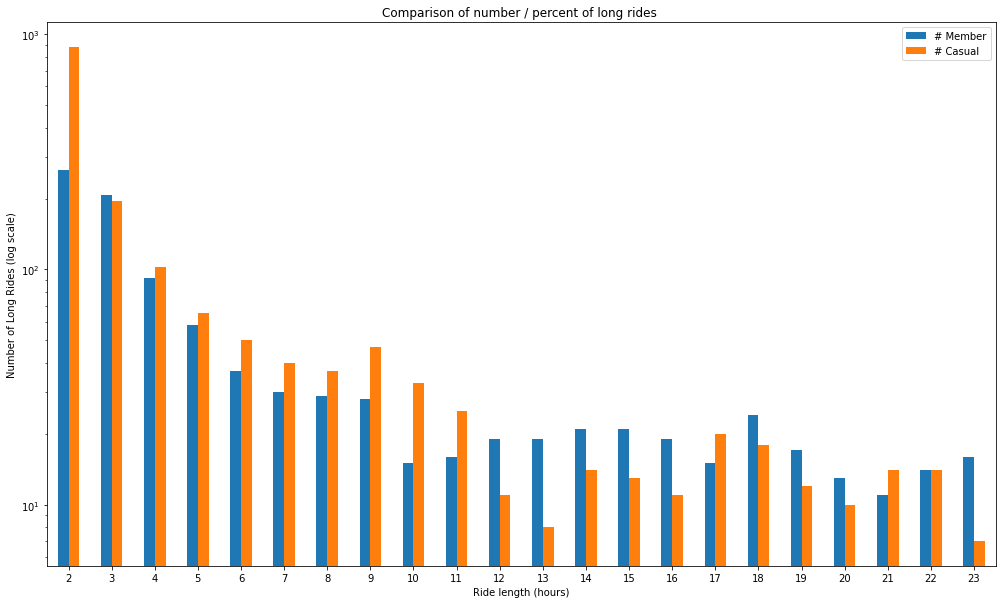

In [139]:
compare = pd.DataFrame({
    '# Member'  : NmLong,
    '% Member': pctMLong,
    '# Casual'  : NcLong,
    '% Casual': pctCLong
})

#ax = plt.gca()
ax = compare[['# Member','# Casual']].plot(kind = 'bar',figsize=(17,10))
plt.ylabel('Number of Long Rides (log scale)')
plt.yscale('log')
#compare[['% Member','% Casual']].plot(kind = 'line',secondary_y = True,ax=ax)
#plt.ylabel('Percent of long rides')

ax.set_xticklabels(hours)
plt.xticks(rotation=0,horizontalalignment = 'center')
plt.xlabel('Ride length (hours)')
title = 'Comparison of number / percent of long rides '
plt.title(title)

#ax.grid(axis='y')
plt.show()

In [140]:
bigData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12883947 entries, 0 to 247539
Data columns (total 12 columns):
 #   Column            Dtype          
---  ------            -----          
 0   start_time        datetime64[ns] 
 1   end_time          datetime64[ns] 
 2   start_station_id  object         
 3   end_station_id    object         
 4   usertype          object         
 5   start_lat         float64        
 6   start_lng         float64        
 7   end_lat           float64        
 8   end_lng           float64        
 9   tripduration      timedelta64[ns]
 10  month             int64          
 11  year              int64          
dtypes: datetime64[ns](2), float64(4), int64(2), object(3), timedelta64[ns](1)
memory usage: 1.2+ GB
